In [1]:
%pylab inline
import cluster
from imp import reload
reload(cluster)

Populating the interactive namespace from numpy and matplotlib


<module 'cluster' from '/home/chuphay/Clustering/code/online/cluster.py'>

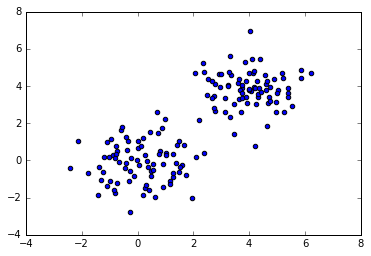

In [34]:
seed(123)
n = 160
x = randn(2*n).reshape(n,2)
for i in range(n//2,n):
    x[i][0] += 4
    x[i][1] += 4
def gauss_sim(x,y, sigma = 1):
    d = (x[0]-y[0])**2 + (x[1] - y[1])**2
    return np.exp(-d/(2*sigma))
adjacency = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(i+1,n):
        g_s = gauss_sim(x[i],x[j])
        adjacency[i][j] = g_s
        adjacency[j][i] = g_s
scatter(x[:,0],x[:,1]);

In [35]:
import cluster2
reload(cluster2)

clusters = cluster2.make_clusters(adjacency, seed = 120)
#clusters.clusters
print(len(clusters.nodes))
#clusters.print_tree()
print(len(clusters.children[0].nodes), len(clusters.children[1].nodes))



Takeover!!! 0.0 0.927732182261 8 24
Takeover!!! 0.0 0.858853405617 41 23
Takeover!!! 0.0 0.965586097236 20 15
Takeover!!! 0.0 0.960242725502 42 20
Takeover!!! 0.0 0.950982608173 60 42
Takeover!!! 0.0 0.901542714334 46 8
Takeover!!! 0.89435923721 0.949336871157 46 60
Takeover!!! 0.0 0.936685977798 61 46
Takeover!!! 0.0 0.940778529484 76 61
Takeover!!! 0.0 0.777855091101 66 3
Takeover!!! 0.0 0.940754444068 25 76
Takeover!!! 0.0 0.785402938405 74 66
Takeover!!! 0.79663275819 0.933189781899 74 25
Takeover!!! 0.0 0.911236684548 5 74
Takeover!!! 0.0 0.918147736014 11 5
Takeover!!! 0.0 0.598956617923 27 68
Takeover!!! 0.732787842768 0.913231150599 27 11
Takeover!!! 0.0 0.860400420728 34 27
Takeover!!! 0.0 0.979551169067 138 34
Takeover!!! 0.0 0.489043056562 130 102
Takeover!!! 0.0 0.978595606011 82 138
Takeover!!! 0.0 0.975635330791 117 82
Takeover!!! 0.0 0.971175980694 84 117
Takeover!!! 0.0 0.960544242084 120 84
Takeover!!! 0.0 0.950931964734 83 120
Takeover!!! 0.0 0.90700829149 127 101
Tak

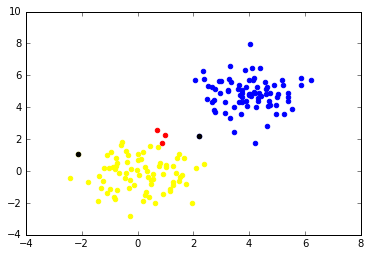

In [32]:
child = clusters.children[0].children[1]#.children[0].children[0].children[0].\
    #children[0].children[0].children[1].children[0].children[0].children[0].children[1]#.\
    #children[1].children[0].children[0].children[0].children[0].children[0].\
    #children[0].children[0].children[0].children[1].children[0].children[0].children[0].\
    #children[0].children[0].children[0].children[0].children[0].children[1].children[0].\
    #children[0].children[0].children[0]

for i in range(len(adjacency)):
    if i in child.children[0].nodes:
        scatter(x[i][0],x[i][1], color = "red")
    elif i in child.children[1].nodes:
        scatter(x[i][0],x[i][1], color = "blue")
    else:
        scatter(x[i][0],x[i][1], color = "yellow")
    if((i == 37) or (i == 8)):
        scatter(x[i][0],x[i][1], color = "black")

In [29]:
print(clusters.children[0].children[1].children[1].nodes)

[120, 105, 128, 133, 108, 125, 101, 148, 155, 134, 117, 88, 100, 146, 150, 82, 83, 138, 112, 132, 157, 91, 136, 122, 119, 127, 118, 121, 102, 80, 130, 84, 96, 154, 95, 99, 98, 111, 86, 85, 90, 87, 152, 107, 129, 149, 81, 159, 147, 143, 115, 124, 144, 145, 156, 114, 153, 151, 94, 109, 89, 104, 116, 137, 141, 110, 135, 140, 97, 92, 123, 8, 126, 113, 106, 93, 139, 142, 103, 158, 131]


In [31]:
myCluster = cluster.make_one_cluster(child.children[0], adjacency)
otherCluster = cluster.make_one_cluster(clusters.children[1], adjacency)
o_oCluster = cluster.make_one_cluster(clusters.children[0].children[1], adjacency)
#c2 = cluster.make_one_cluster(clusters.children[0].children[1].children[1], adjacency)
print(myCluster.get_alpha(otherCluster.nodes))
print(myCluster.get_closest())
print(otherCluster.get_closest())
print(o_oCluster.get_closest())
#print(c2.get_closest())
#print(c2.get_alpha(myCluster.nodes))

(1.2672334204651097, 37)
(8, 0.79291717168959086)
(3, 0.0)
(15, 1.2167365357456845)
